# Multi-omics results of SARS-Cov-2

Examine the output of the DIABLO integrative analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd

In [2]:
prot_plsda_infile = "../results/latest/proteome_1_PLSDA_max.txt"
prot_splsda_infile = "../results/latest/proteome_1_sPLSDA_max.txt"
tran_plsda_infile = "../results/latest/translatome_1_PLSDA_max.txt"
tran_splsda_infile = "../results/latest/translatome_1_sPLSDA_max.txt"
diablo_infile = "../results/latest/1_DIABLO_max.txt"
diablo_corr_infile = "../results/latest/DIABLO_correlations.txt"

In [3]:
prot_plsda = pd.read_csv(prot_plsda_infile, sep="\t")
prot_splsda = pd.read_csv(prot_splsda_infile, sep="\t")
tran_plsda = pd.read_csv(tran_plsda_infile, sep="\t")
tran_splsda = pd.read_csv(tran_splsda_infile, sep="\t")
diablo = pd.read_csv(diablo_infile, sep="\t")
diablo_corr = pd.read_csv(diablo_corr_infile, sep="\t")
loadings = [prot_plsda, prot_splsda, tran_plsda, tran_splsda, diablo]

In [4]:
def make_absolute(data):
    """Read dataframe, add absolute values for importance col"""
    data["abs_importance"] = data["importance"].abs()
    return data

def extract_percentile(data, threshold=0.95):
    """Extract percentile from data"""
    return data[data.abs_importance > data.abs_importance.quantile(threshold)]

def match_top_cols(data_superset, data_subset, condition=None, labels=("A", "B"), title=None):
    """Compare PLSDA and sPLSDA top values"""
    data_superset = data_superset.iloc[0:len(data_subset)]
    if condition:
        data_superset = data_superset[data_superset.GroupContrib == condition]
        data_subset = data_subset[data_subset.GroupContrib == condition]
    venn2([set(data_superset.index.tolist()), set(data_subset.index.tolist())], set_labels=labels)
    plt.title(title)
    plt.show()

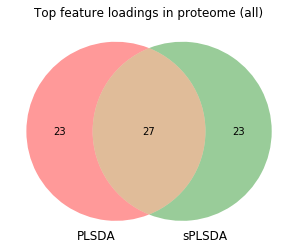

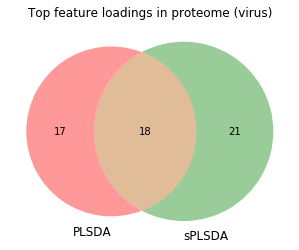

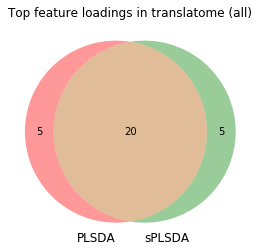

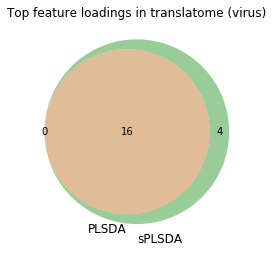

In [5]:
loadings = [make_absolute(loading) for loading in loadings]
match_top_cols(
    loadings[0], loadings[1], condition=None, labels=("PLSDA", "sPLSDA"), 
    title="Top feature loadings in proteome (all)"
)
match_top_cols(
    loadings[0], loadings[1], condition="Virus_24h", labels=("PLSDA", "sPLSDA"), 
    title="Top feature loadings in proteome (virus)"
)
match_top_cols(
    loadings[2], loadings[3], condition=None, labels=("PLSDA", "sPLSDA"), 
    title="Top feature loadings in translatome (all)"
)
match_top_cols(
    loadings[2], loadings[3], condition="Virus_24h", labels=("PLSDA", "sPLSDA"), 
    title="Top feature loadings in translatome (virus)"
)